In [119]:
#%load_ext autoreload
#%autoreload 2
import warnings
warnings.filterwarnings("ignore")

import IPython
from IPython.display import clear_output

import numpy as np
import pandas as pd
import seaborn as sns
from sys import path, platform
import os
from matplotlib import pyplot as plt

# from scipy.io import netcdf_file
import netCDF4
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import arviz as az
from arviz import from_netcdf

from utils import load_data, plotting
from cm_models.factorial_models import NoBias_CEC, NoBias_EEC, NoBias_JEC
from cm_models.factorial_models import LRBias_CEC, LRBias_EEC, LRBias_JEC
from cm_models.factorial_models import TempBias_CEC, TempBias_EEC, TempBias_JEC
from cm_models.factorial_models import Heu_CEC


In [2]:
# Graphing libraries
# import arviz as az
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# from slotscraving.decision.utils import plotting, load_data
# from scipy.special import expit

In [84]:
project_dir = '/Users/cristybanuelos/Documents/Craving'    
model_dir = f'{project_dir}/Model_Comparison'

longform_path = f'{project_dir}/KK_clean_data/all_group_longform.csv'
summary_path = f'{project_dir}/KK_clean_data/all_group_df_summary.csv'

df_summary, longform = load_data.load_clean_dbs(summary_path, longform_path)
netcdf_path = f"{project_dir}/Model_Comparison/EMU/"
#data = pd.read_csv(f'{netcdf_path}Heu_CEC/money_MS12.nc', delimiter=',')

sub_summary:    Unnamed: 0   PID  id  Other Key                Block Order  \
0           0  MS12   4  chocolate  ['money', 'other', 'end']   

  Reversal Timings  Base Craving  Base Mood     Timestamp  Money Accuracy  \
0                B          26.0       29.0  1.660138e+09            0.75   

   Other Accuracy Group  Round  Money Score  Other Score  
0        0.683333   emu      1         41.0         33.0  
sub_longform:      Unnamed: 0   PID   id  Block   Type  Trial      Cue Time  Action  \
0             0  MS12  259    1.0  money    1.0  1.660138e+09     0.0   
1             1  MS12  260    1.0  money    2.0  1.660138e+09     1.0   
2             2  MS12  261    1.0  money    3.0  1.660138e+09     0.0   
3             3  MS12  262    1.0  money    4.0  1.660138e+09     0.0   
4             4  MS12  263    1.0  money    5.0  1.660138e+09     0.0   
..          ...   ...  ...    ...    ...    ...           ...     ...   
115         115  MS12  374    2.0  other   56.0  1.660139e

In [184]:
binge_data = pd.read_csv(f'{project_dir}/KK_Prolific_data/Binge/binge_round2_clean_df_summary.csv', 
                         delimiter=',')
binge_data

,pid,id,other_key,block_order,reversal_timings,base_craving,base_mood,timestamp
0,5e06ecd524f9390991997bb7,1,donuts,"['money', 'other', 'end']",A,27.0,40.0,1.661448e+09
1,5bace423b95cc700014b5334,2,chips,"['money', 'other', 'end']",D,38.0,27.0,1.661448e+09
2,5dc483cf74939e34e55c3619,3,donuts,"['other', 'money', 'end']",A,0.0,21.0,1.661448e+09
3,608bfa04767191aa4d57bfd8,4,donuts,"['other', 'money', 'end']",D,25.0,42.0,1.661448e+09
4,6266db0dcf3e4f16fb9d7c56,6,chips,"['other', 'money', 'end']",D,0.0,24.0,1.661448e+09
5,5d8a29c082fec30001d9c24a,7,donuts,"['other', 'money', 'end']",D,50.0,50.0,1.661448e+09
6,5ee85ec585a33015e839df78,9,donuts,"['other', 'money', 'end']",A,40.0,32.0,1.661448e+09
7,622ab357bb3af819f2e5df3b,10,chocolate,"['money', 'other', 'end']",A,43.0,43.0,1.661448e+09
8,615ddab1e4f013092538b6c5,12,chocolate,"['other', 'money', 'end']",B,27.0,29.0,1.661448e+09
9,60f7320f98a037fd7718e698,13,chocolate,"['other', 'money', 'end']",C,9.0,20.0,1.661448e+09


In [185]:
emu_data = pd.read_csv(summary_path, 
                         delimiter=',')
emu_data

,Unnamed: 0,PID,id,Other Key,Block Order,Reversal Timings,Base Craving,Base Mood,Timestamp,Money Accuracy,Other Accuracy,Group,Round,Money Score,Other Score
0,0,MS12,4,chocolate,"['money', 'other', 'end']",B,26.0,29.0,1.660138e+09,0.75,0.683333,emu,1,41.0,33.0
1,1,MS015,5,chocolate,"['other', 'money', 'end']",B,21.0,23.0,1.663942e+09,0.60,0.516667,emu,1,35.0,32.0
2,2,MS016,6,chips,"['money', 'other', 'end']",D,4.0,16.0,1.664812e+09,0.70,0.666667,emu,1,29.0,34.0


In [97]:
models = ['NoBias_CEC', 'NoBias_EEC', 'NoBias_JEC',
          'LRBias_CEC', 'LRBias_EEC', 'LRBias_JEC',
          'TempBias_CEC', 'TempBias_EEC', 'TempBias_JEC',
          'Heu_CEC']
conditions = ['money', 'other']
subjects = ['MS12', 'MS015', 'MS016']
waic_df = pd.DataFrame(columns = ['model', 'condition', 'subject', 'waic'])


for mod in models:
    
    for cond in conditions:
        
        for subj in subjects:
            
            curr_nc = az.from_netcdf(netcdf_path+f'{mod}/'+f'{cond}_{subj}.nc')
            curr_waic = az.waic(curr_nc, var_name="like")
            curr_dict = {'model':[mod],'condition':[cond],'subject':[subj],'waic':[curr_waic[0]]}
            curr_df = pd.DataFrame(curr_dict)
            waic_df = pd.concat([waic_df, curr_df])
            

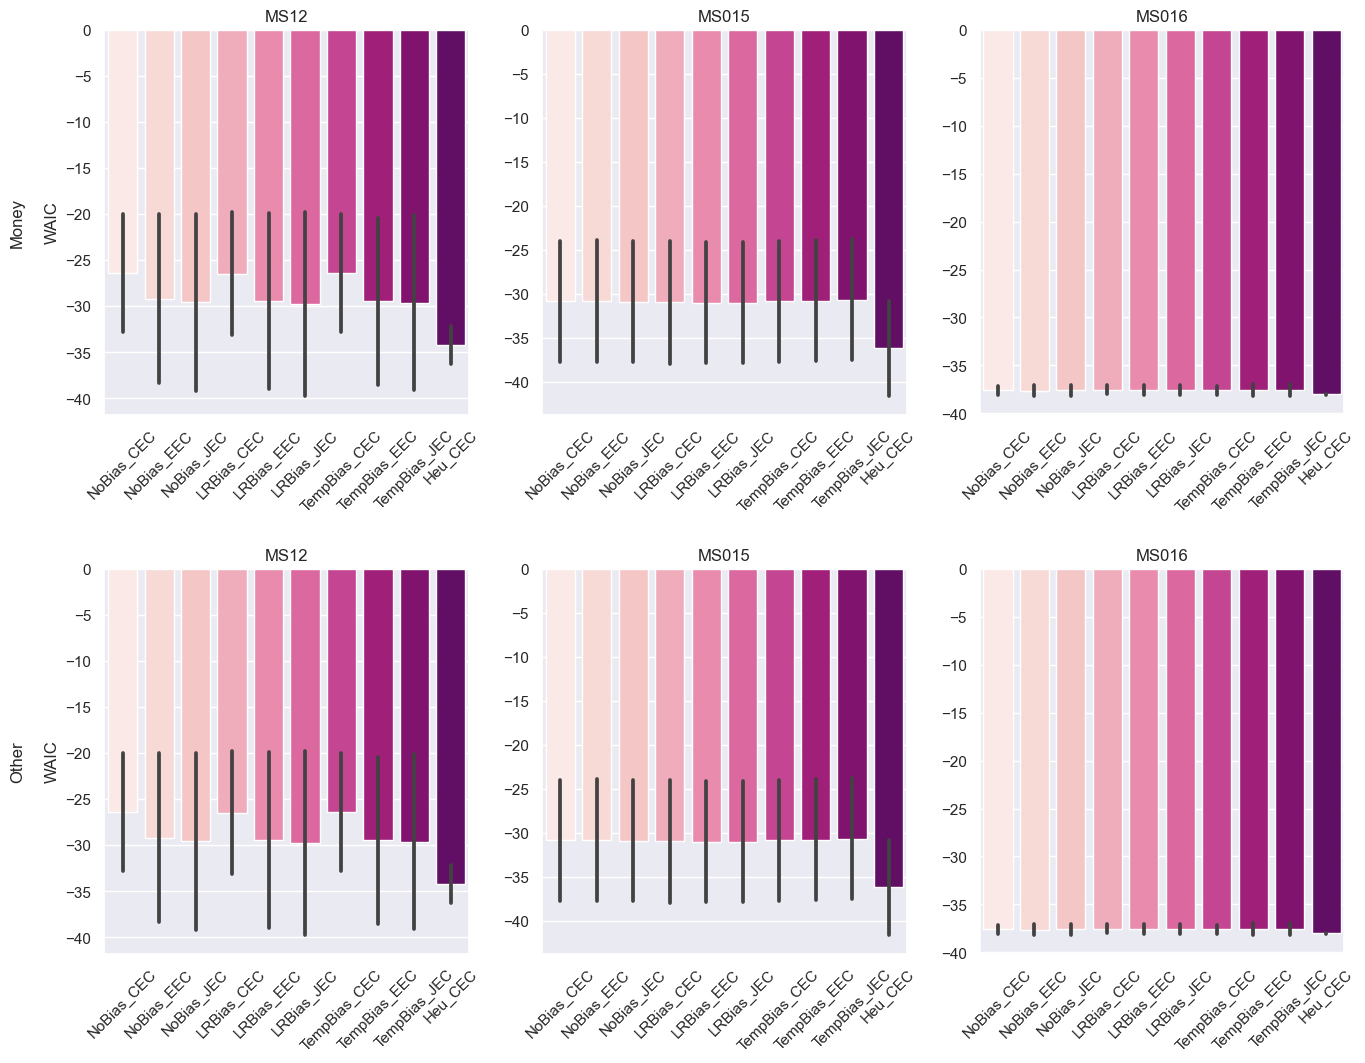

In [189]:
sns.set_theme()
sns.set_context("notebook", font_scale=1)

grid_kws = {"hspace": 0.4, "wspace": 0.2}
fig, axs = plt.subplots(2,3, figsize=(16,12), gridspec_kw=grid_kws)
plt.rcParams["figure.autolayout"] = True

for cond in conditions:

    count = -1
    
    for subj in subjects:
        count += 1
        
        if cond == "money": curr_ax = axs[0][count]
        else: curr_ax = axs[1][count]
        
        data = waic_df[waic_df['subject']==subj]
        
        fig = sns.barplot(data['model'], data['waic'], palette=sns.color_palette("RdPu", 10),
                     ax = curr_ax)

        curr_ax.set_title(f"{subj}")
        if count == 0: 
            axs[0][0].set(ylabel='Money\n\nWAIC')
            axs[1][0].set(ylabel='Other\n\nWAIC')
        else: curr_ax.set(ylabel='')
        curr_ax.set(xlabel='')
        curr_ax.set_xticklabels(labels=models, rotation=45)
        
plt.tight_layout()

        

### Decision Model variations:
* **No Bias**: No craving modulation (Rescorla Wagner)
* **LR Bias**: Craving modulation of learning rate (Rescorla Wagner)
* **Temp Bias**: Craving modulation of temperature (Rescorla Wagner)

### Craving Model variations:
* **CEC**: Cue-elicited craving
* **EEC**: Expectation-elicited craving
* **JEC**: Cue-elicted craving + Expectation-elicited craving

Note: The models are defined in the following order:
1. NoBias_CEC
2. NoBias_EEC
3. NoBias_JEC
4. LRBias_CEC
5. LRBias_EEC
6. LRBias_JEC
7. TempBias_CEC
8. TempBias_EEC
9. TempBias_JEC
10. Heu_CEC (Null model; Decisions are made with a win-stay-lose-shift heuristic, craving is cue-elicited)

In [73]:
nc1 = az.from_netcdf(netcdf_path+'LRBias_CEC/'+'money_MS12.nc')
nc2 = az.from_netcdf(netcdf_path+'Heu_CEC/'+'money_MS12.nc')

compare_dict = {"LR Bias CEC": nc1, "Heu CEC": nc2}
model_compare = az.compare(compare_dict, ic='waic', var_name="like")
model_compare
#fig = plt.figure(figsize =(10, 7))
#fig = plt.bar(compare_dict.keys(), model_compare.waic)

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
LR Bias CEC,0,-33.153288,1.907679,0.000000,0.798285,3.675645,0.000000,False,log
Heu CEC,1,-36.304483,0.857235,3.151195,0.201715,3.048725,3.328334,False,log


In [81]:
waic_compare = az.waic(nc1, var_name="like")
#az.plot_compare(waic_compare)
waic_compare

Computed from 4000 posterior samples and 59 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -33.15     3.68
p_waic        1.91        -

• hdi

In [28]:
nc.log_likelihood.like.values

array([[[-1.51163787, -0.24916475, -0.19863376, ..., -0.16505177,
         -0.16072572, -0.64925577],
        [-1.90377122, -0.16134976, -0.11219014, ..., -0.08005323,
         -0.07613639, -0.44998471],
        [-1.74771252, -0.19136864, -0.17657702, ..., -0.17023052,
         -0.16718596, -0.66288715],
        ...,
        [-0.9938909 , -0.46224775, -0.32834955, ..., -0.18744666,
         -0.17568514, -0.42291852],
        [-1.1333177 , -0.38855387, -0.2908097 , ..., -0.24467407,
         -0.24324121, -0.47392032],
        [-1.40631969, -0.2810951 , -0.24091035, ..., -0.24293754,
         -0.24293272, -0.47442678]],

       [[-0.75957943, -0.63085459, -0.38871221, ..., -0.09632128,
         -0.07791285, -0.44082848],
        [-0.75957943, -0.63085459, -0.38871221, ..., -0.09632128,
         -0.07791285, -0.44082848],
        [-0.69036372, -0.69593842, -0.47412393, ..., -0.13147419,
         -0.10661687, -0.46899273],
        ...,
        [-1.30076548, -0.31789836, -0.27874391, ..., -

In [6]:
import pymc3 as pm
from collections import OrderedDict

def run_models(df, upper_order=5):
    """
    Convenience function:
    Fit a range of pymc3 models of increasing polynomial complexity.
    Suggest limit to max order 5 since calculation time is exponential.
    """

    models, traces = OrderedDict(), OrderedDict()

    for k in range(1, upper_order + 1):

        nm = f"k{k}"
        fml = create_poly_modelspec(k)

        with pm.Model() as models[nm]:

            print(f"\nRunning: {nm}")
            pm.glm.GLM.from_formula(
                fml,
                df,
                priors={"Intercept": pm.Normal.dist(mu=0, sigma=100)},
                family=pm.glm.families.Normal(),
            )

            traces[nm] = pm.sample(2000, tune=1000, init="advi+adapt_diag")

    return models, traces

def create_poly_modelspec(k=1):
    """
    Convenience function:
    Create a polynomial modelspec string for patsy
    """
    return ("y ~ 1 + x " + " ".join([f"+ np.power(x,{j})" for j in range(2, k + 1)])).strip()

def generate_data(n=20, p=0, a=1, b=1, c=0, latent_sigma_y=20):
    """
    Create a toy dataset based on a very simple model that we might
    imagine is a noisy physical process:
        1. random x values within a range
        2. latent error aka inherent noise in y
        3. optionally create labelled outliers with larger noise

    Model form: y ~ a + bx + cx^2 + e

    NOTE: latent_sigma_y is used to create a normally distributed,
    'latent error' aka 'inherent noise' in the 'physical' generating
    process, rather than experimental measurement error.
    Please don't use the returned `latent_error` values in inferential
    models, it's returned in the dataframe for interest only.
    """

    df = pd.DataFrame({"x": rndst.choice(np.arange(100), n, replace=False)})

    # create linear or quadratic model
    df["y"] = a + b * (df["x"]) + c * (df["x"]) ** 2

    # create latent noise and marked outliers
    df["latent_error"] = rndst.normal(0, latent_sigma_y, n)
    df["outlier_error"] = rndst.normal(0, latent_sigma_y * 10, n)
    df["outlier"] = rndst.binomial(1, p, n)

    # add noise, with extreme noise for marked outliers
    df["y"] += (1 - df["outlier"]) * df["latent_error"]
    df["y"] += df["outlier"] * df["outlier_error"]

    # round
    for col in ["y", "latent_error", "outlier_error", "x"]:
        df[col] = np.round(df[col], 3)

    # add label
    df["source"] = "linear" if c == 0 else "quadratic"

    # create simple linspace for plotting true model
    plotx = np.linspace(
        df["x"].min() - np.ptp(df["x"].values) * 0.1,
        df["x"].max() + np.ptp(df["x"].values) * 0.1,
        100,
    )

    ploty = a + b * plotx + c * plotx ** 2
    dfp = pd.DataFrame({"x": plotx, "y": ploty})

    return df, dfp

n = 12

rndst = np.random.RandomState(0)
df_lin, dfp_lin = generate_data(n=n, p=0, a=-30, b=5, c=0, latent_sigma_y=40)

dfs_lin = df_lin.copy()
dfs_lin["x"] = (df_lin["x"] - df_lin["x"].mean()) / df_lin["x"].std()

models_lin, traces_lin = run_models(dfs_lin, 5)


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.



Running: k1

You can find the C code in this temporary file: /var/folders/1v/gxxr24d12m95vt1nrvq_81y80000gq/T/theano_compilation_error_vs3fo50g


Exception: ("Compilation failed (return status=1): ld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/lib/libSystem.tbd' for architecture x86_64. clang-14: error: linker command failed with exit code 1 (use -v to see invocation). ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.0001}))')

array([[<AxesSubplot:title={'center':'untr_alpha_pos'}>,
        <AxesSubplot:title={'center':'untr_alpha_pos'}>],
       [<AxesSubplot:title={'center':'untr_alpha_neg'}>,
        <AxesSubplot:title={'center':'untr_alpha_neg'}>],
       [<AxesSubplot:title={'center':'weight_zero'}>,
        <AxesSubplot:title={'center':'weight_zero'}>],
       [<AxesSubplot:title={'center':'mod'}>,
        <AxesSubplot:title={'center':'mod'}>],
       [<AxesSubplot:title={'center':'cec_weight'}>,
        <AxesSubplot:title={'center':'cec_weight'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'alpha_pos'}>,
        <AxesSubplot:title={'center':'alpha_pos'}>],
       [<AxesSubplot:title={'center':'alpha_neg'}>,
        <AxesSubplot:title={'center':'alpha_neg'}>],
       [<AxesSubplot:title={'center':'probs_craving'}>,
        <AxesSubplot:title={'center':'probs_craving'}>]], dtype=object)

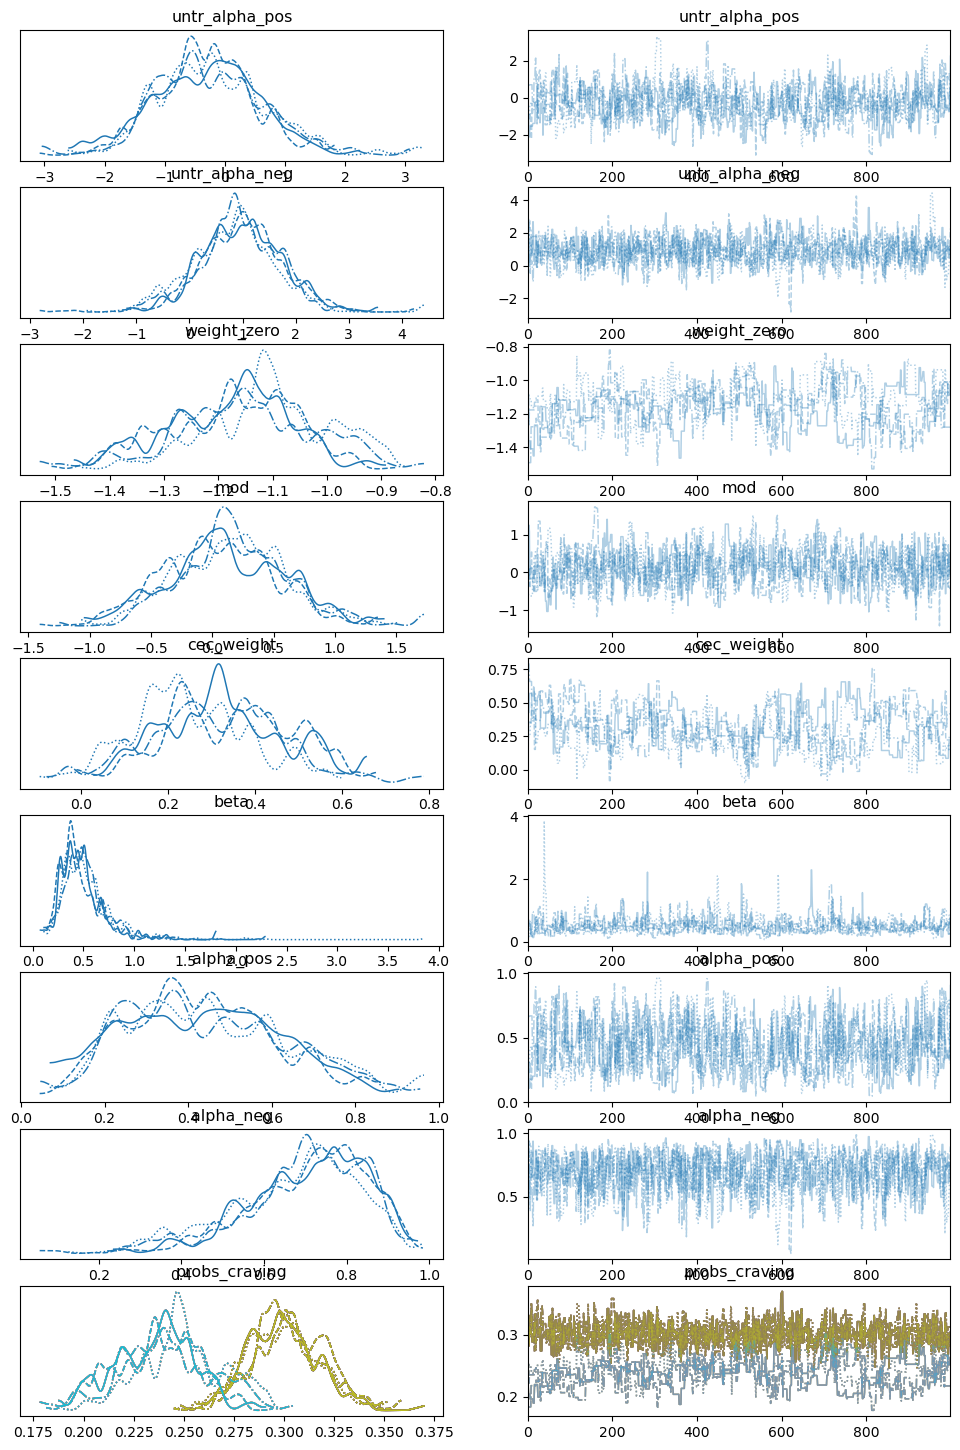

In [177]:
az.plot_trace(nc.posterior)

In [175]:
az.summary(nc.sample_stats)

/Users/cristybanuelos/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:583: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/Users/cristybanuelos/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:583: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/Users/cristybanuelos/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:583: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/Users/cristybanuelos/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/cristybanuelos/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:583: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
accept[0],0.734,2.788,0.000,2.053,0.045,0.032,4120.0,3774.0,1.00
accept[1],0.947,7.173,0.000,2.214,0.113,0.080,1664.0,1384.0,1.01
accept[2],0.969,8.719,0.000,2.005,0.138,0.097,2994.0,3495.0,1.00
accept[3],0.747,16.219,0.000,1.284,0.256,0.181,3798.0,3990.0,1.00
accept[4],0.959,12.424,0.000,1.940,0.196,0.139,3043.0,1951.0,1.00
accept[5],0.486,4.246,0.000,1.367,0.067,0.047,4051.0,3913.0,1.00
scaling[0],1.025,0.043,1.000,1.100,0.022,0.017,4.0,4.0,NaN
scaling[1],1.544,0.164,1.331,1.772,0.082,0.063,4.0,4.0,31633592.87
scaling[2],1.651,0.070,1.611,1.772,0.035,0.027,4.0,4000.0,NaN
scaling[3],0.420,0.019,0.387,0.430,0.009,0.007,4.0,4.0,NaN


In [162]:
'''
dimensions(sizes): 
variables(dimensions): 
groups: posterior, posterior_predictive, log_likelihood, sample_stats, observed_data
'''

grp_keys = nc.groups()

for grp in grp_keys:
    var_keys = nc.groups()[grp]
    print(grp, var_keys)

""" in this dataset each component will be 
in the form nt,nz,ny,nx i.e. all the variables will be flipped. """

TypeError: list indices must be integers or slices, not str

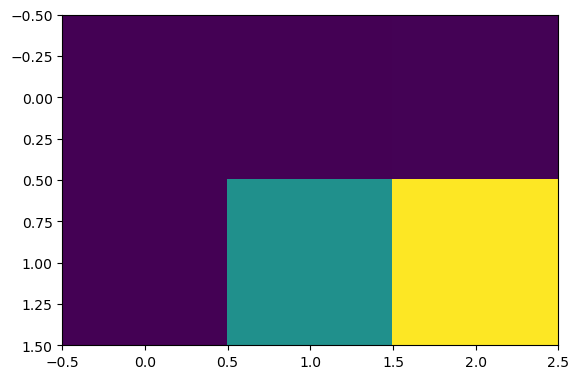

In [113]:
acc_dim_0 = nc.groups['sample_stats'].variables['accept_dim_0'][:]
acc = nc.groups['sample_stats'].variables['accept'][0][:]

plt.imshow((acc[0], acc_dim_0))
plt.show()

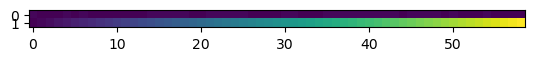

In [104]:
obs_like_dim_0 = nc.groups['observed_data'].variables['like_dim_0'][:]
obs_like = nc.groups['observed_data'].variables['like'][:]

plt.imshow((obs_like, obs_like_dim_0))
plt.show()

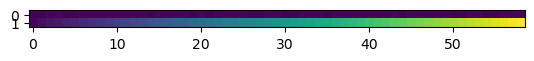

In [111]:
log_like_dim_0 = nc.groups['log_likelihood'].variables['like_dim_0'][:]
log_like = nc.groups['log_likelihood'].variables['like'][:]

plt.imshow((log_like[0][0], log_like_dim_0))
plt.show()

#### craving_like = pm.Binomial('craving_like', n=50, p=probs_craving, observed=cravings)

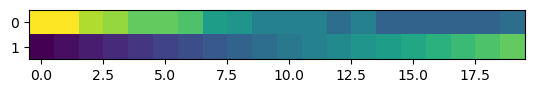

In [114]:
cra_dim_0 = nc.groups['observed_data'].variables['craving_like_dim_0'][:]
cra = nc.groups['observed_data'].variables['craving_like'][:]

plt.imshow((cra, cra_dim_0))

""" imshow is a 2D plot function
according to what I have said before this will plot the second
iteration of the vertical slize with y = 0, one of the vertical
boundaries of your model. """

plt.show() # this shows the plot

## Load all models

In [18]:
NoBias_CEC = NoBias_CEC(longform, df_summary, project_dir, netcdf_path, netcdf_path)
beta, cec_weight, alpha_pos, alpha_neg, weight_zero = NoBias_CEC._define_priors()

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [6]:
heuristic = Heuristic.Heuristic(model_name='heuristic', save_path=netcdf_path, summary=df_summary, longform=longform)
heuristic.calc_decision_model(jupyter=True)
heuristic.calc_Q_table()
heuristic.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...
No Q values available for this model.


In [7]:
rw = RescorlaWagner.RW(model_name='rw', save_path=netcdf_path, summary=df_summary, longform=longform)
rw.calc_decision_model(jupyter=True)
rw.calc_Q_table()
rw.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...
Q table not calculated, running now


In [8]:
rwdecay = RWDecay.RWDecay(model_name='rwdecay', save_path=netcdf_path, summary=df_summary, longform=longform)
rwdecay.calc_decision_model(jupyter=True)
rwdecay.calc_Q_table()
rwdecay.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...


In [9]:
#rwrl = RWRL.RWRL(model_name='rwrl', save_path=netcdf_path, summary=df_summary, longform=longform)
#rwrl.calc_decision_model(jupyter=True)
#rwrl.calc_Q_table()
#rwrl.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...


## Model comparison

In [13]:
plotting.plot_model_comparison(
    [NoBias_CEC, NoBias_EEC, NoBias_JEC,
    LRBias_CEC, LRBias_EEC, LRBias_JEC,
    TempBias_CEC, TempBias_EEC, TempBias_JEC,
    Heu_CEC], 
    sum=True, 
    metric='dic',
    # y_range=[3050,3375]
)